In [134]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
os.chdir(r"C:\Users\user\Desktop\PTW")
data = pd.read_csv('Exercise_1.csv')

In [136]:
data.head()
##data.info()

,Date,District,Type of Event,Question and Remarks
0,20180802.0,ALLAHABAD,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...
1,20180512.0,SIDDHARTH NAGAR,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...
2,20180614.0,AMBEDKAR NAGAR,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...
3,20180605.0,SIDDHARTH NAGAR,ATTEMPTED MURDER,Q: Can we take your valuable feedback on you...
4,20180808.0,GONDA,DOMESTIC VIOLENCE,Q: Can we take your valuable feedback on you...


In [137]:

df = pd.DataFrame(data)
df = df.iloc[0:200]

In [138]:
df.shape

(200, 4)

In [139]:
qna = df["Question and Remarks"].tolist()
broken = []
for i in range(200):
    broken.append(re.split('Q:|Ans:|Comment:|Remark:',qna[i]))
    

In [140]:
broken[1]

['  ',
 ' Can we take your valuable feedback on your registered event with UP100 P12051805390?\xa0\xa0\xa0',
 ' YES    ',
 ' Are you satisfied with the immediate relief provided to address your issue?\xa0\xa0\xa0',
 ' Not Satisfied    ',
 ' Please select the reason\xa0\xa0\xa0',
 ' No action taken by Police Station staff.    ',
 ' Do you want to share any additional feedback?\xa0\xa0\xa0',
 ' -1    ',
 ' ',
 '    ',
 ' ',
 ' Caller Police Station gaye lekin unki koi bhi sahayta nahi kari gai. caller ko shak hai police ne ghoos liya hai kyoki caller call karke batata hai muzrim yaha hai paKADIYE par police kuch nahi karti hai ...   ']

In [141]:
remark_col = []
comments_col = []
col_1 = []
col_2 = []
col_3 = []
#col_4 is needed only if the length of an entry is 13. not needed in case of length 11
col_4 = []
for i in range(200):
    broken[i][0] = len(broken[i])
    remark_col.append(broken[i][-1])
    comments_col.append(broken[i][-3])
    col_1.append(broken[i][2])
    col_2.append(broken[i][4])
    col_3.append(broken[i][6])
    if broken[i][0] == 13:
        col_4.append(broken[i][8])
    else:
        col_4.append("NA")
        

In [142]:
df['Date'] = df['Date'].astype(int)

In [143]:
df.head()

,Date,District,Type of Event,Question and Remarks
0,20180802,ALLAHABAD,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...
1,20180512,SIDDHARTH NAGAR,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...
2,20180614,AMBEDKAR NAGAR,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...
3,20180605,SIDDHARTH NAGAR,ATTEMPTED MURDER,Q: Can we take your valuable feedback on you...
4,20180808,GONDA,DOMESTIC VIOLENCE,Q: Can we take your valuable feedback on you...


In [144]:
df['Can_We_Take_Feedback'] = col_1
df['satisfaction'] = col_2
df['Reason_for_unsat'] = col_3
df['Additional_feedback'] = col_4
df['remark']=remark_col
df['comments']=comments_col
df = df.drop("Question and Remarks", axis = 1)
df.head()

,Date,District,Type of Event,Can_We_Take_Feedback,satisfaction,Reason_for_unsat,Additional_feedback,remark,comments
0,20180802,ALLAHABAD,ABSCOND FROM CUSTODY,YES,Not Satisfied,No action taken by Police Station staff.,NO,caller santust nahi hai thane ki police vipak...,
1,20180512,SIDDHARTH NAGAR,ABSCOND FROM CUSTODY,YES,Not Satisfied,No action taken by Police Station staff.,-1,Caller Police Station gaye lekin unki koi bhi...,
2,20180614,AMBEDKAR NAGAR,ABSCOND FROM CUSTODY,YES,Not Satisfied,No action taken by Police Station staff.,NO,Caller Police Station gaye lekin unki koi bhi...,
3,20180605,SIDDHARTH NAGAR,ATTEMPTED MURDER,YES,Not Satisfied,Others,NA,,
4,20180808,GONDA,DOMESTIC VIOLENCE,YES,Not Satisfied,Others,NA,,


In [145]:
df['Date'] = df['Date'].astype(str)
df.info()
df.shape
df['Date'] = df['Date'].str[:4] + '-' + df['Date'].str[4:6] + '-' + df['Date'].str[6:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
Date                    200 non-null object
District                200 non-null object
Type of Event           200 non-null object
Can_We_Take_Feedback    200 non-null object
satisfaction            200 non-null object
Reason_for_unsat        200 non-null object
Additional_feedback     200 non-null object
remark                  200 non-null object
comments                200 non-null object
dtypes: object(9)
memory usage: 14.1+ KB


In [146]:
df.head()

,Date,District,Type of Event,Can_We_Take_Feedback,satisfaction,Reason_for_unsat,Additional_feedback,remark,comments
0,2018-08-02,ALLAHABAD,ABSCOND FROM CUSTODY,YES,Not Satisfied,No action taken by Police Station staff.,NO,caller santust nahi hai thane ki police vipak...,
1,2018-05-12,SIDDHARTH NAGAR,ABSCOND FROM CUSTODY,YES,Not Satisfied,No action taken by Police Station staff.,-1,Caller Police Station gaye lekin unki koi bhi...,
2,2018-06-14,AMBEDKAR NAGAR,ABSCOND FROM CUSTODY,YES,Not Satisfied,No action taken by Police Station staff.,NO,Caller Police Station gaye lekin unki koi bhi...,
3,2018-06-05,SIDDHARTH NAGAR,ATTEMPTED MURDER,YES,Not Satisfied,Others,NA,,
4,2018-08-08,GONDA,DOMESTIC VIOLENCE,YES,Not Satisfied,Others,NA,,


In [147]:
df['Date'] = df['Date'].str[:] + " 01:00:00"

In [148]:
df['Date'] = pd.to_datetime(df['Date'])

In [149]:
df['month'] = df['Date'].dt.month

In [150]:
district_count = df['District'].value_counts() # type series
satisfaction_count = df['satisfaction'].value_counts()
toe_count = df['Type of Event'].value_counts()
month_count = df['month'].value_counts()
day_count = df['Date'].value_counts()

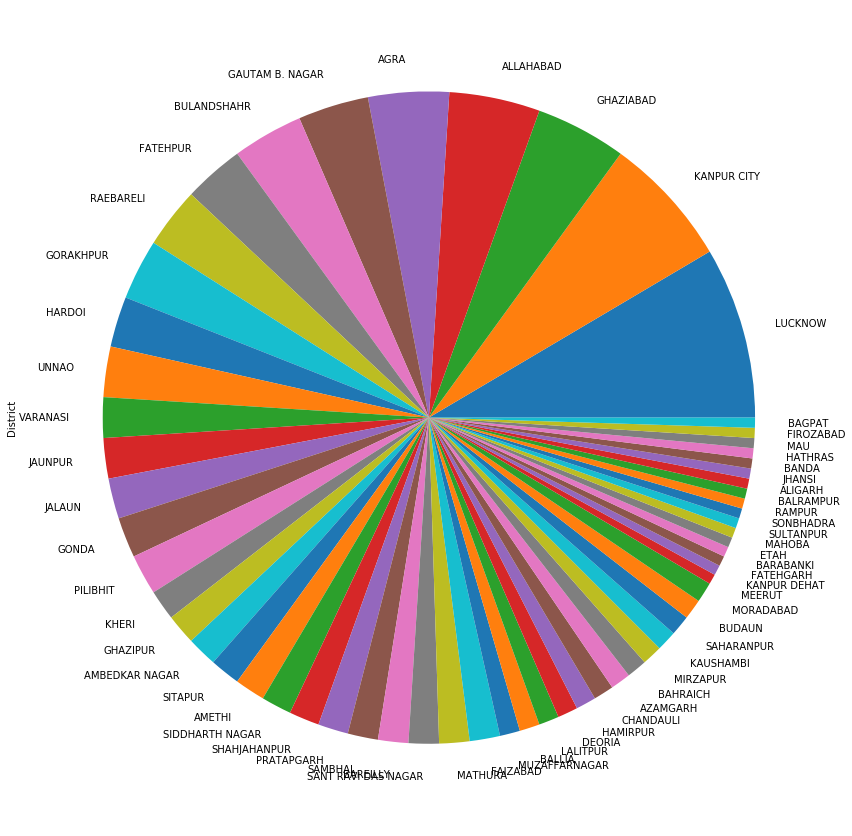

In [151]:
district_count.plot(figsize = (40,15),kind = 'pie')

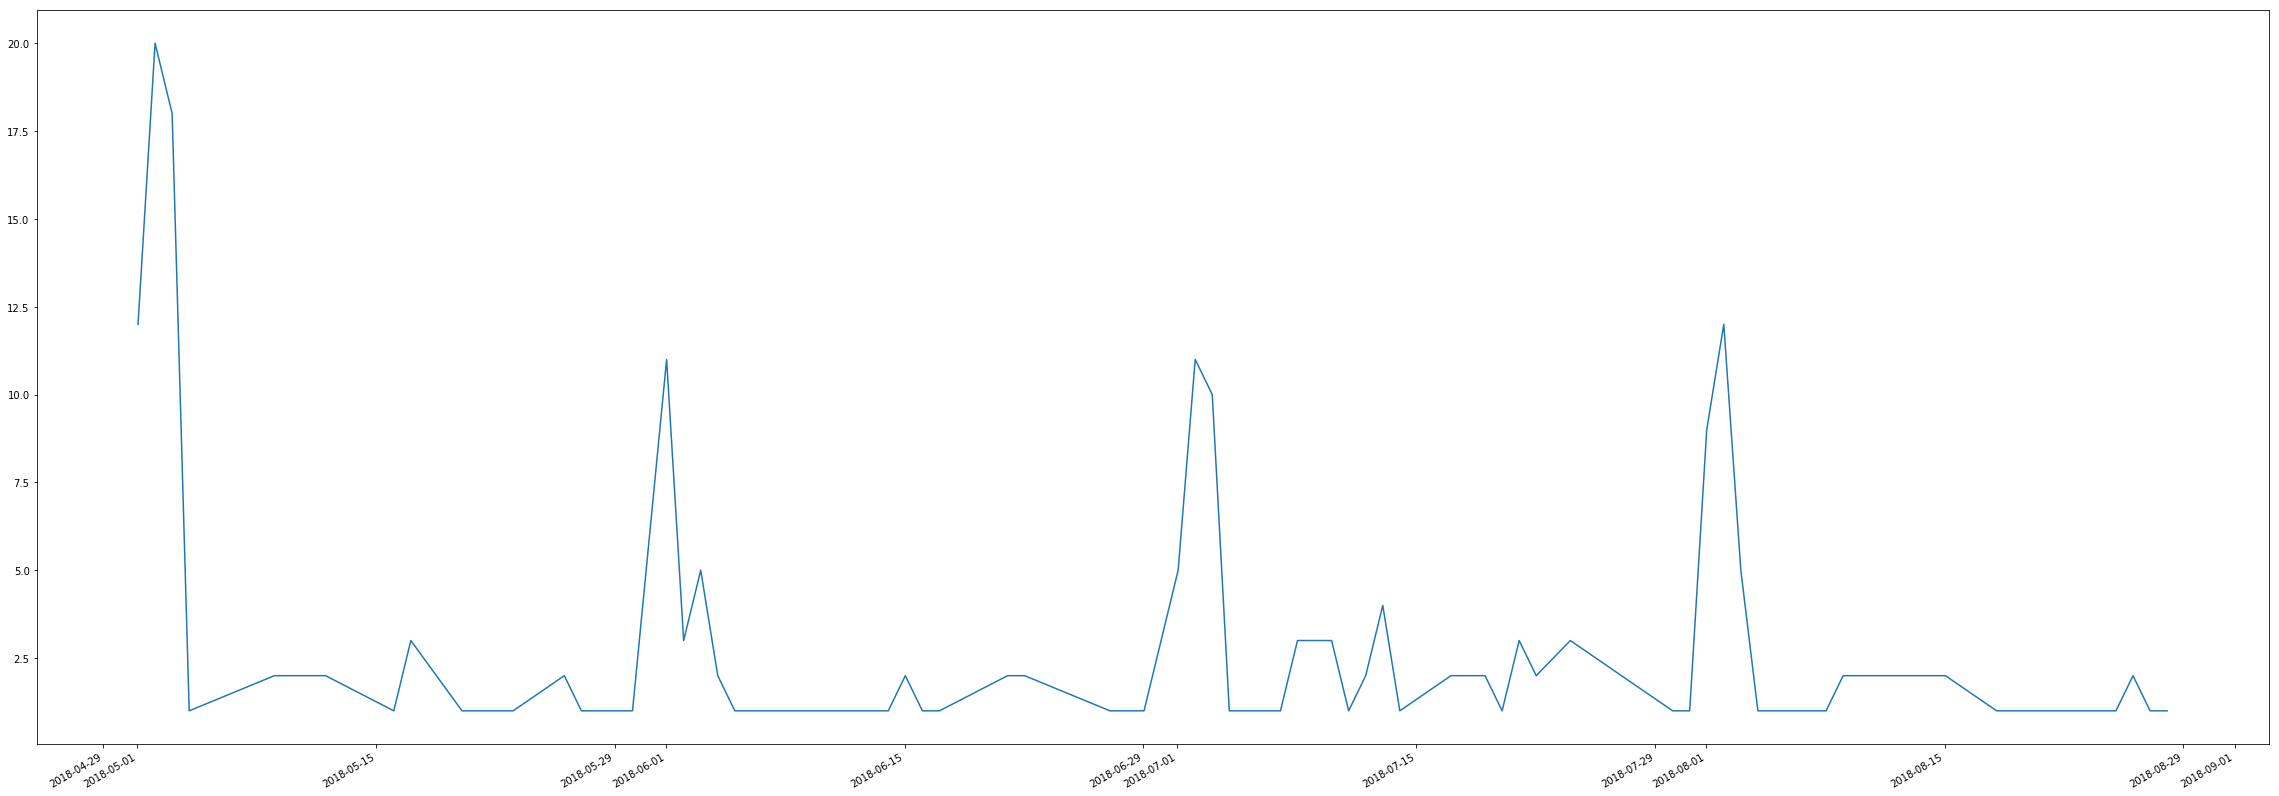

In [152]:
day_count.plot(figsize=(40, 15))

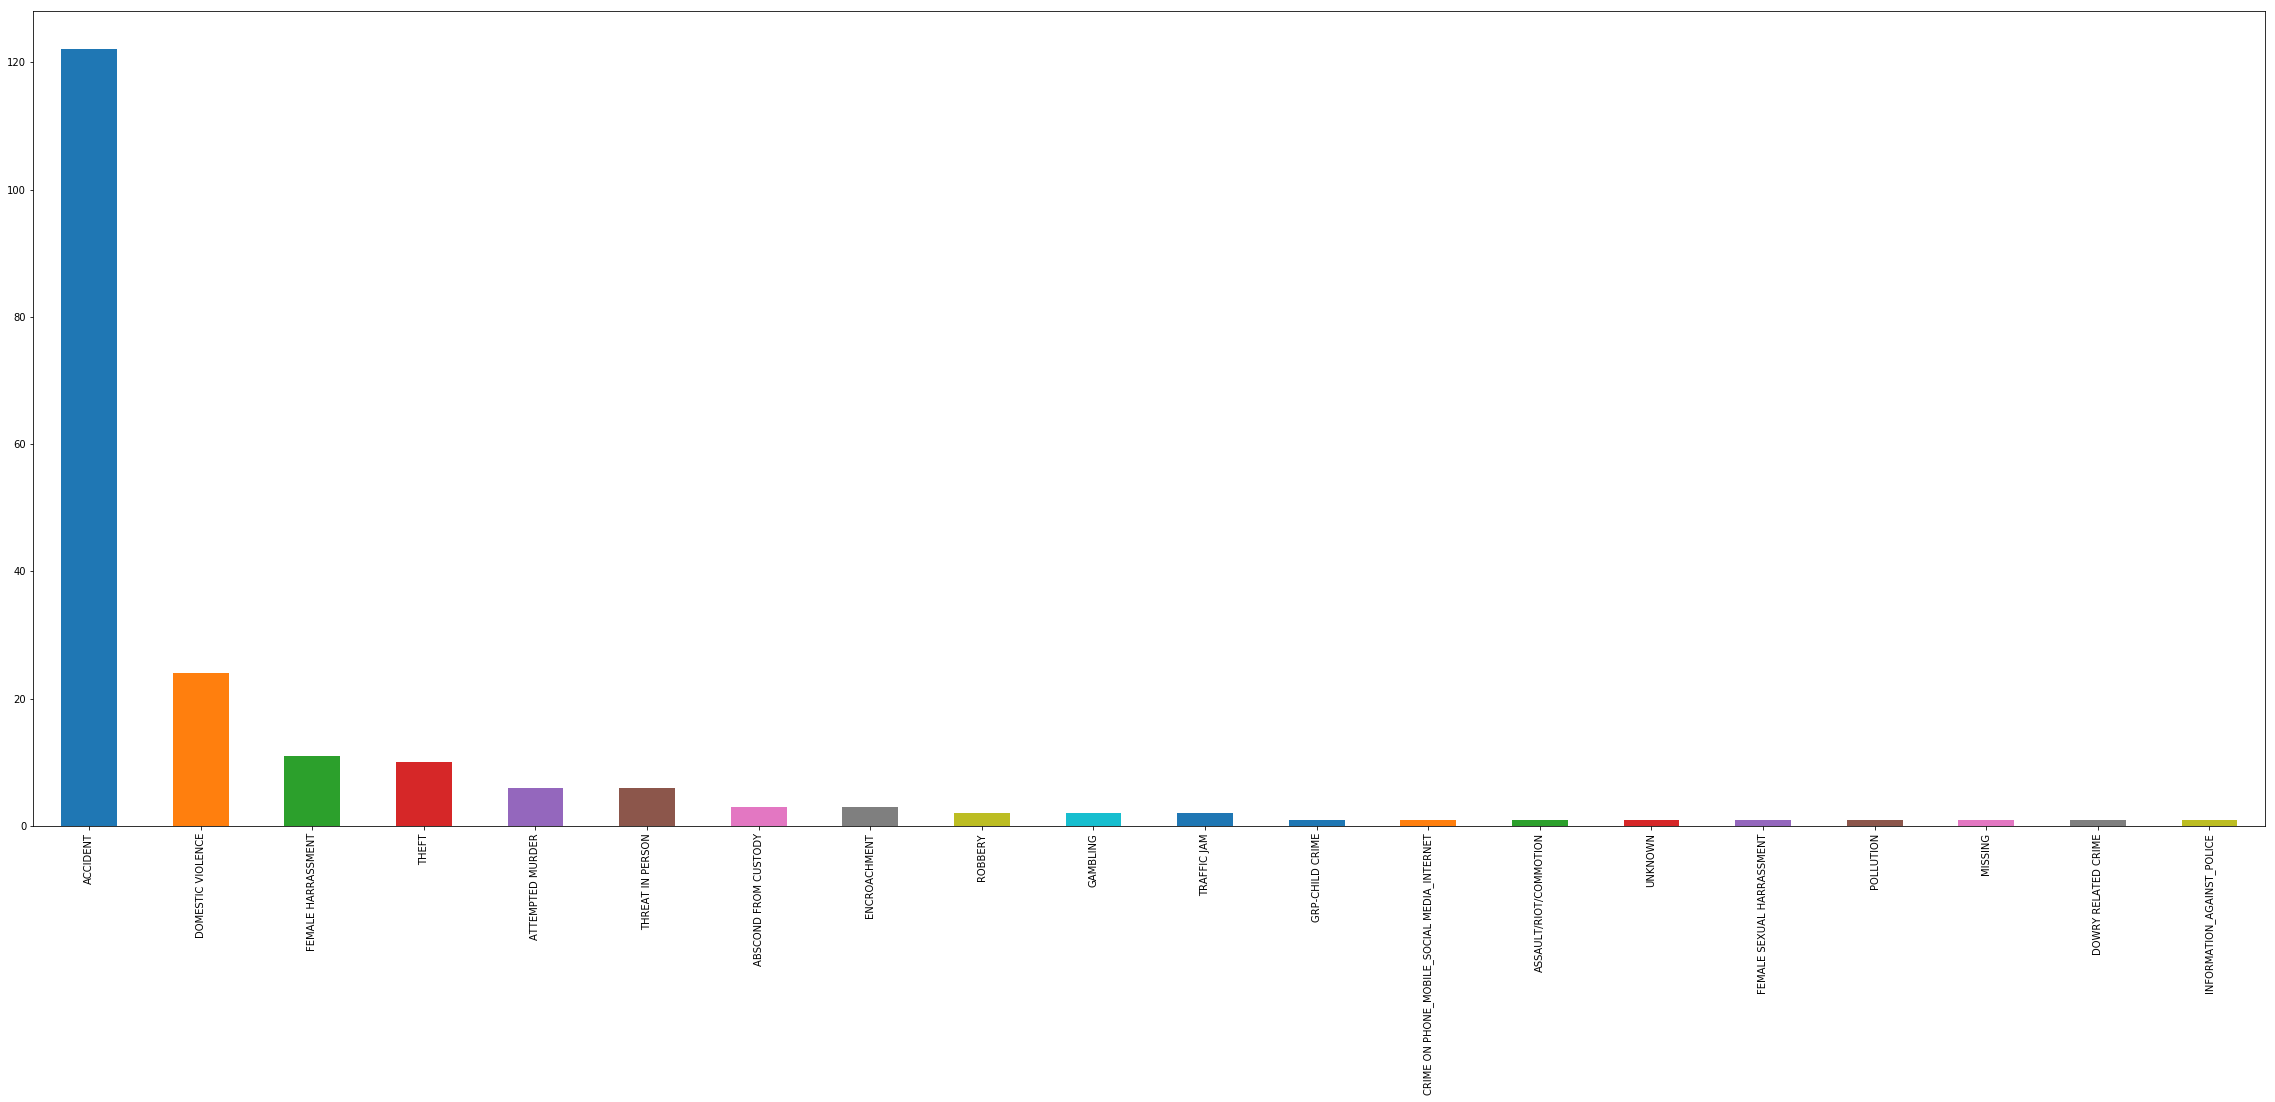

In [153]:
toe_count.plot(figsize=(40, 15), kind = 'bar')

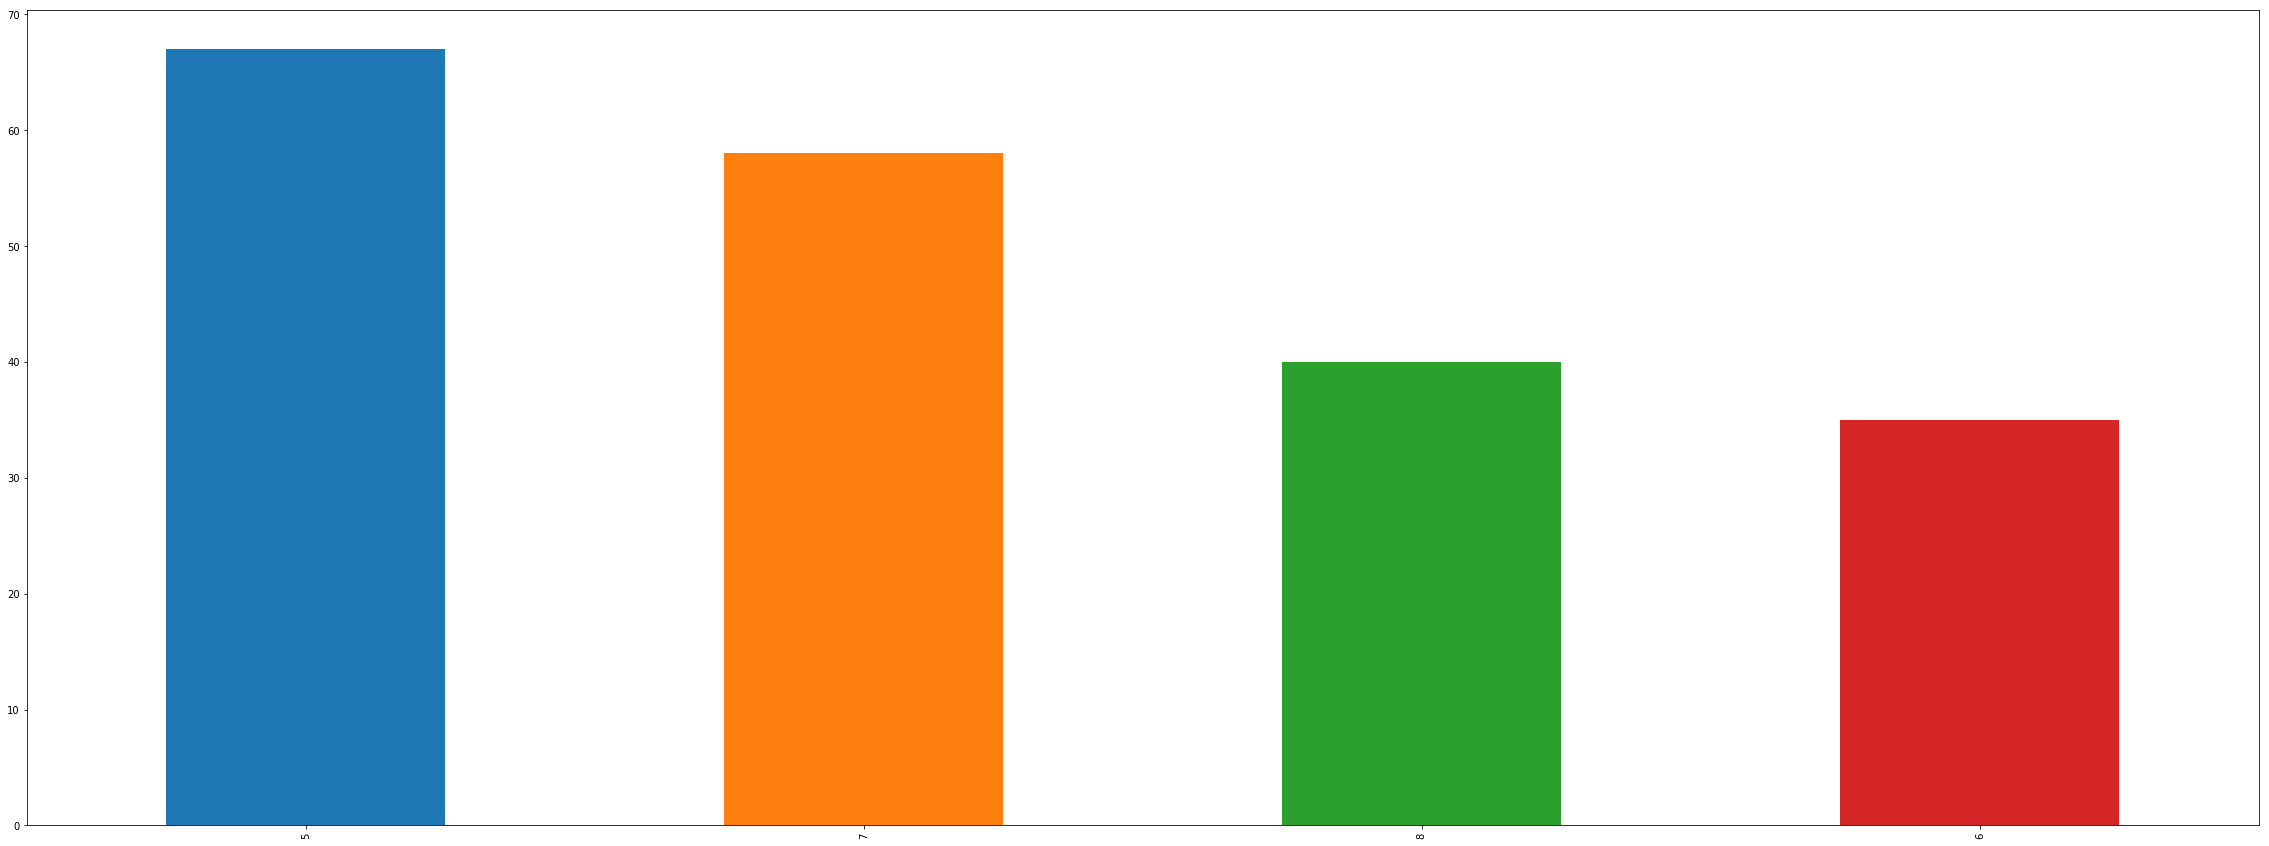

In [154]:
month_count.plot(figsize=(40, 15), kind = 'bar')